In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw = pd.read_csv('allegro-api-transactions.csv')

# Praca domowa 2


In [3]:
raw.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

# Target encoding

Target encoding jest jednym ze sposobów kodowania danych kategorycznych. Etykietę każdej kategorii, podmienia się na średnią wartość docelowej cechy w obrębie danej kategorii. Dzięki temu dane kategoryczne są w formie pojedycznych wartości liczbowych, które dodatkowo mówią coś o naszej cesze co do której planujemy dokonywać predykcji.

In [5]:
# implementacja w pandasie
cat_means = dict(raw.groupby('it_location')['price'].mean())
x = raw['it_location'].map(cat_means)
x

0          85.423398
1          85.423398
2          61.990914
3          35.433365
4         117.191956
             ...    
420015     24.306929
420016     66.785334
420017     18.682800
420018    106.203076
420019     78.136792
Name: it_location, Length: 420020, dtype: float64

In [6]:
# implementacja z biblioteki category_encoders
import category_encoders as ce
target_encoder = ce.TargetEncoder(cols=['it_location'])
df = target_encoder.fit_transform(raw, raw['price'])
df['it_location']

0          85.423398
1          85.423398
2          61.990914
3          35.433365
4         117.191956
             ...    
420015     24.306929
420016     66.785334
420017     18.682800
420018    106.203076
420019     78.136792
Name: it_location, Length: 420020, dtype: float64

In [7]:
# liczba kategorii `it_location`
len(raw['it_location'].value_counts())

10056

One Hot Encoding koduje dane kategoryczne do wektorów o długości równej liczbie kategorii. W przypadku bardzo rozdrobnionych cech kategorycznych, gdzie jest bardzo dużo rożnych kategorii, target encoding jest lepszym rozwiązaniem. Nie zwiększa on drastycznie wymiarowości danych (co jest niepożądane w przypdaku budowania modeli) oraz pojedynczy wektor powinien zajmować mniej miejsca niż ogromna macierz (aczkolwiek takie macierze są przechowywane w [obiektach](https://docs.scipy.org/doc/scipy/reference/sparse.html#sparse-matrix-classes), które są zoptymalizowane do przechowywania macierzy rzadkich).

One Hot Encoding stworzyłby w tym przypadku macierz o wymiarach 420,020 x 10,056 co jest zbyt dużym rozmiarem do dalszej analizy i wykorzystania informacji o kategoriach.

Target encoding, może jednak prowadzić do overfittingu, ponieważ taka transformacja jest ściśle powiązana z wartościami cechy docelowej, które znajdują się w zestawie treningowym.

# OneHot/Leave One Out/CatBoost
Poniżej są przykłady zastowania 3 różnych enkoderów danych kategorycznych z biblioteki `category_encoders`
## One Hot Encoder

In [8]:
# onehot
onehot = ce.OneHotEncoder(cols=['main_category'])
onehot_result = onehot.fit_transform(raw)

In [9]:
onehot_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category_1         420020 non-null  int64  
 14  main_category_2     

Po zastosowaniu OneHotEncoder, ramka danych urosła nam o **27 nowych kolumn**, jedna na każdą z kategorii które się znajdowały w kolumnie `main_category`.

## Leave One Out Encoder
Leave One Out Encoder działa podobnie jak Target Encoder, z tą różnicą że podczas liczenia średniej, **pomijana jest wartość `target` kodowanej właśnie próbki.** Ma to na celu zmniejszenie zaburzenia średniej przez elementy odstające.

In [10]:
loo_encoder = ce.LeaveOneOutEncoder(cols=['main_category'])
loo_result = loo_encoder.fit_transform(raw, raw['price'])
loo_result['main_category']

0         121.814331
1          75.859357
2          72.434342
3          25.028061
4          75.859080
             ...    
420015    107.530709
420016     28.129044
420017     75.859337
420018     71.203327
420019    134.418844
Name: main_category, Length: 420020, dtype: float64

Kolumna `main_category` zawiera teraz **pojedyncze wartości liczbowe.**

## CatBoost Encoder
CatBoost Encoder jest rozwinięciem Leave One Out Encoder, tylko zamiast liczyć średnią ze wszystkich pozostałych próbek z danej kategorii, algorytm wylicza średnią na podstawię tylko tych próbek, które wcześniej napotkał. Enkoder przebiega więc po rzędach po kolei od góry do dołu. W celu zapobiegnięciu overfittingowi, w oryginalnej implementacji przeprowadzanych jest kilka takich przebiegów, które są poprzeplatane z losowymi permutacjami rzędów i wyciągana jest średnia dla każdej próbki. 

Jednak w [implementacji](https://contrib.scikit-learn.org/category_encoders/catboost.html) z biblioteki `category_encoders` enkoder przeprowadza tylko jeden przebieg, dlatego ważne jest ręczne przelosowanie kolejności próbek przed dopasowaniem enkodera (zwłaszcza w przypadkach gdy rzędy w ramce danych są posortowane wg. kolumny celu).

In [11]:
df = raw.sample(frac=1)
catboost = ce.CatBoostEncoder(cols=['main_category'])
catboost_result = catboost.fit_transform(df, df['price'])
catboost_result['main_category']

260049     76.811350
182844     76.811350
86575      76.811350
128318     44.405675
380978     76.811350
             ...    
203626     72.435384
371275     72.435400
182811     25.032084
160381     71.207524
412282    107.536923
Name: main_category, Length: 420020, dtype: float64

In [12]:
catboost_result.head(2)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
260049,260049,2016-04-03 22:33:58,6092412333,"['Dla Dzieci', 'Akcesoria dla dzieci', 'Krzese...",1,1,GambiShop,189.0,1,84,0,4000,Lębork,76.81135
182844,182844,2016-04-03 12:39:21,6090900154,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",0,0,ojanuszczak,0.0,0,0,0,12,Puławy,76.81135


# Uzupełnianie brakujących danych

Teraz ograniczmy się tylko do kolumn numerycznych i na potrzeby krótszego czasu obliczeń, zmniejszmy rozmiar zbioru danych do 10,000. Sprawdźmy jeden ze sposobów uzupełniania brakujących danych za pomocą algorytmu k-NN. Algorytm ten uzupełnia dane na podstawie k innych najbliższych (ze względu na pozostałe cechy) rekordów, które posiadają brakujące cechy.

Jako test działania algorytmu powtórzmy 10 razy poniższe czynności:
* Usuńmy wartość `it_seller_raitng` z losowo wybranych 10% rekordów.
* Przeprowadźmy imputację i porównajmy wyniki do właściwych usuniętych wartości za pomocą RSME.

In [26]:
raw_num = raw[['it_seller_rating', 'it_quantity', 'price']].sample(n=10000).reset_index(drop=True)

In [27]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error



def random_remove_values(df, col, rate):
    indices_of_vals_to_remove = np.random.choice(df.index.values, size=int(len(df) * rate))
    output_df = df.copy()
    output_df.loc[indices_of_vals_to_remove, col] = np.nan
    return output_df, indices_of_vals_to_remove

# imputacja jest wykonywana i mierzona na pierwszej kolumnie w `columns`
def imputation_score(df_input, imputer, columns, rates):
    assert len(columns) == len(rates)
    df = df_input.copy()
    indices_of_removed_vals = []

    for i in range(len(columns)):
        df, indices = random_remove_values(df, columns[i], rates[i])
        indices_of_removed_vals.append(indices)

    imputer_result = imputer.fit_transform(df)
    imputer_result_df = pd.DataFrame(imputer_result, columns=df.columns)

    return mean_squared_error(df_input.loc[indices_of_removed_vals[0], columns[0]],
                              imputer_result_df.loc[indices_of_removed_vals[0], columns[0]],
                              squared=False)

In [28]:
scores_1 = np.array([])
for i in range(10):
    scores_1 = np.append(scores_1, imputation_score(raw_num, KNNImputer(n_neighbors=3),
                                                ['it_seller_rating'], [0.1]))
scores_1.std()    

1855.8802903932465

Odchylenie standardowe wyników 10 testów wynosi **1856**, na poniższym wykresie widać że większość testów osiągała bląd RSME między 37,000 a 44,000.

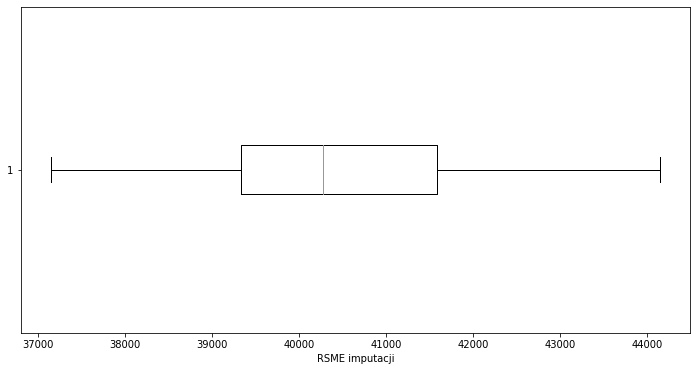

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(scores_1, vert=False)
plt.xlabel('RSME imputacji')
plt.show()

Aby mięć pojęcie czy są to duże błedy w porównaniu do imputowanych wartości, spójrzmy na rozkład zmiennej `it_seller_rating`. Rozkład jest silnie skośny i większość obserwacji ma wartość mniej niż 40,000, więc w większości przypadków błąd jest większy niż wartość większości próbek. Jest to słaby wynik.

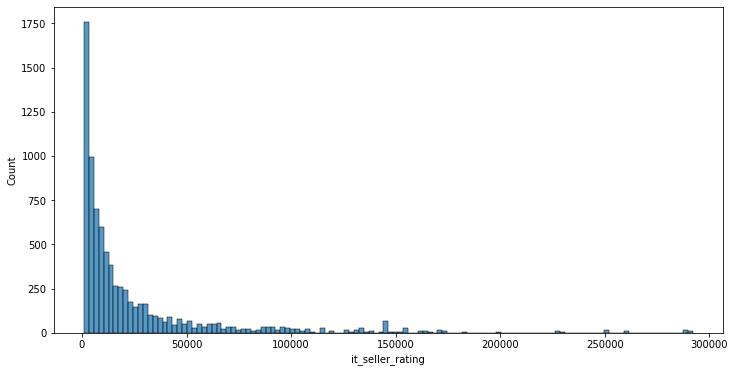

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(raw_num.loc[raw_num['it_seller_rating'] > 1000,'it_seller_rating'])
plt.show()

Teraz przeprowadźmy podobny test imputowania wartości `it_seller_rating`, tym razem dodatkowo usuwając wartości kolumny `it_quantity` niezależnie 10% wylosowanym obserwacjom.

In [31]:
scores_2 = np.array([])
for i in range(10):
    scores_2 = np.append(scores_2, imputation_score(raw_num, KNNImputer(n_neighbors=3),
                                                ['it_seller_rating', 'it_quantity'], [0.1, 0.1]))
scores_2.std()

1182.2299361846312

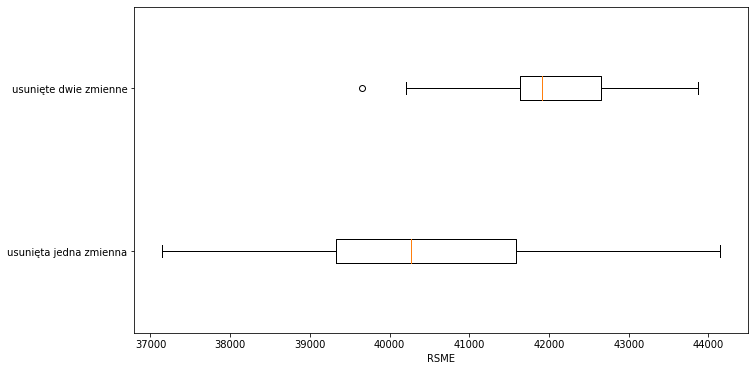

In [32]:
fig, ax = plt.subplots(figsize=(11,6))
bp = ax.boxplot([scores_1, scores_2], labels=['usunięta jedna zmienna','usunięte dwie zmienne'], vert=False)
plt.xlabel('RSME')
plt.show()

Tym razem wartości błędów RSME są większe oraz ich odchylenie standardowe jest mniejsze. Więc tak jak można było się spodziewać, przy brakujących dwóch zmiennych algorytm gorzej sobie poradził z imputacją brakujących wartości. W tym przypadku wartości błędów są zbyt duże by był sens korzystać z tego imputera. Z drugiej strony trudno się dziwić. Wydedukowanie oceny sprzedawcy na podstawie ocen sprzedawców "najbliższych" ofert, gdzie ta "bliskość" jest definiowana tylko na podstawie liczby wystawionych sztuk na sprzedaż i ich cenie, wydaje się być niemożliwym zadaniem.

Imputer k-NN posiada parametr `k` (domyślnie ustawiony na 5), opowiadający liczbie najbiższych sąsiadów, których bierze pod uwagę podczas imputacji. Sprawdźmy jak jego wartość wpływa na wiekość błędu. Zmieńmy też liczbę powtórzeń testów na większą niż 10, być może wyniki będą miały mniejszy rozstrzał.

In [33]:
row_list = []

for k in range(2, 9):
    for j in range(50):
        row_list.append({'k':k, 'removed_vars':1,
                         'RSME': imputation_score(raw_num, KNNImputer(n_neighbors=k), ['it_seller_rating'], [0.1])})
        
for k in range(2, 9):
    for j in range(50):
        row_list.append({'k':k, 'removed_vars':2,
                         'RSME': imputation_score(raw_num, KNNImputer(n_neighbors=k), ['it_seller_rating', 'it_quantity'], [0.1, 0.1])})
results = pd.DataFrame(row_list)

<AxesSubplot:xlabel='k', ylabel='RSME'>

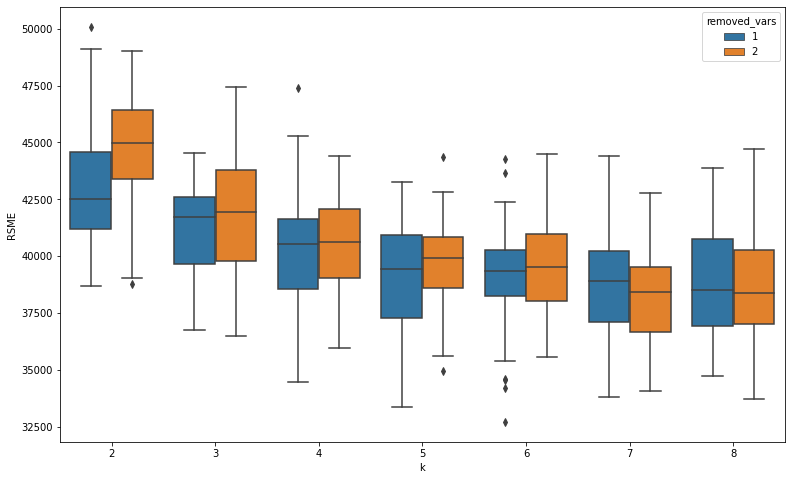

In [34]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(data=results, x='k', y='RSME', hue='removed_vars')

Jak widać na wykresie, większa wartość `k`, sprawia że błędy imputera są mniejsze. Aczkolwiek zwiększanie `k` powyżej 6 nie daje już znacząco lepszych rezultatów. Również tutaj, w przypadku parametru `k<=6` , błędy w testeach gdzie usnięto wartości z dwóch kolumn były większe. W przypadku największych wartości `k=7` i `k=8` różnica ta się zaciera. Co ciekawe, zwiększenie liczby testów o danych parametrach z 10 do 50, nie zmniejszyło odchyleń standardowych. Wręcz przeciwnie, każde z nich było większe od poprzednich eksperymentów, które polegały na dziesięciu powtórzeniach.

In [36]:
results.groupby(['k', 'removed_vars'])['RSME'].std()

k  removed_vars
2  1               2609.119932
   2               2488.027237
3  1               1904.853180
   2               2761.746565
4  1               2394.531000
   2               2060.542873
5  1               2377.714547
   2               1912.111424
6  1               2350.495825
   2               2227.412034
7  1               2214.844634
   2               2196.696500
8  1               2206.794986
   2               2501.446357
Name: RSME, dtype: float64